# Lab 1 - Data mining
## Topic: Dimension reduction methods: Principal Component Analysis (PCA)
**Bartłomiej Jamiołkowski 18.03.2024**

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import mpl_axes_aligner
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import KernelPCA

### 1. Analysis of the New York Times dataset

#### 1.1 Load the NYT dataset as a DataFrame.

In [2]:
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

#### 1.2 Displaying 20 randomly selected dictionary items.

In [3]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['manhole' 'lengthy' 'suit' 'gilman' 'proposed' 'consecutive' 'harrisons'
 'religious' 'double' 'nowhere' 'ask' 'loan' 'face' 'type' 'meditation'
 'optimism' 'shared' 'paid' 'between' 'exist']


#### 1.3 PCA transformation skipping columns that do not represent words but only metadata.

In [4]:
pca = PCA(svd_solver='arpack')
X_pca = pca.fit_transform(array)

#### 1.4 For the first leading component, display the 15 elements with the highest value (including column names - words). What words correspond to the highest values of the first leading component?

In [5]:
X_pc1 = pca.components_[0]
sorted_X_pc1_indices_top_15 = X_pc1.argsort()[::-1][:15]
sorted_X_pc1_top_15 = X_pc1[sorted_X_pc1_indices_top_15]
words_X_pc1_top_15 = np.array(header)[sorted_X_pc1_indices_top_15]
df_X_pc1_top_15 = pd.DataFrame({'Values': sorted_X_pc1_top_15, 'Words': words_X_pc1_top_15})
print(df_X_pc1_top_15)

      Values      Words
0   0.261274        she
1   0.245293        her
2   0.202113         ms
3   0.150283          i
4   0.133606       said
5   0.106872     mother
6   0.103009     cooper
7   0.094325         my
8   0.087887   painting
9   0.071196    process
10  0.069885  paintings
11  0.068574         im
12  0.065621        mrs
13  0.065310         he
14  0.063793         me


The highest values of the first leading component are assigned to the words and pronouns that have the greatest impact on the value of this component. It can be seen that the highest values are obtained for words and pronouns related to art, e.g. 'painting' or 'paintings'.

#### 1.5 For the first leading component, display the 15 elements with the lowest value (with column names in words). What words correspond to the smallest values of the first leading component?

In [6]:
sorted_X_pc1_indices_bottom_15 = X_pc1.argsort()[:15]
sorted_X_pc1_bottom_15 = X_pc1[sorted_X_pc1_indices_bottom_15]
words_X_pc1_bottom_15 = np.array(header)[sorted_X_pc1_indices_bottom_15]
df_X_pc1_bottom_15 = pd.DataFrame({'Values': sorted_X_pc1_bottom_15, 'Words': words_X_pc1_bottom_15})
print(df_X_pc1_bottom_15)

      Values      Words
0  -0.112116      music
1  -0.087807       trio
2  -0.074046    theater
3  -0.069269  orchestra
4  -0.058591  composers
5  -0.055554      opera
6  -0.051178   theaters
7  -0.049025          m
8  -0.049001    program
9  -0.048819    players
10 -0.048123   festival
11 -0.047941       east
12 -0.047912          y
13 -0.046032     jersey
14 -0.044931   symphony


The smallest values of the first leading component are assigned to the words and pronouns that have the least impact on the value of this component. In the case of the smallest values of the first leading component, the lowest values are obtained for: 'music', 'trio', 'orchestra', 'opera', i.e. concepts related to music.

#### 1.6 Repeat the experiment for the second leading component. Comment on your results.
##### 1.6.1 For the second leading component, display the 15 elements with the highest value (with column names - words). What words correspond to the highest values of the first leading component?

In [7]:
X_pc2 = pca.components_[1]
sorted_X_pc2_indices_top_15 = X_pc2.argsort()[::-1][:15]
sorted_X_pc2_top_15 = X_pc2[sorted_X_pc2_indices_top_15]
words_X_pc2_top_15 = np.array(header)[sorted_X_pc2_indices_top_15]
df_X_pc2_top_15 = pd.DataFrame({'Values': sorted_X_pc2_top_15, 'Words': words_X_pc2_top_15})
print(df_X_pc2_top_15)

      Values       Words
0   0.220785         her
1   0.213074         she
2   0.162391     theater
3   0.129926       opera
4   0.124470          ms
5   0.081202           i
6   0.080759        hour
7   0.074653        sang
8   0.074158  production
9   0.073009    festival
10  0.072345       music
11  0.070708     musical
12  0.069232       songs
13  0.067603   orchestra
14  0.067588       vocal


The highest values of the second leading component are obtained for words and pronouns related to music, e.g. 'opera', 'sang', 'festival', 'music'. There is a noticeable difference in the value of the second component. They are lower than the value of the first component.

##### 1.6.2 For the second leading component, display the 15 elements with the lowest value (with column names - words). What words correspond to the smallest values of the first leading component?

In [8]:
sorted_X_pc2_indices_bottom_15 = X_pc2.argsort()[:15]
sorted_X_pc2_bottom_15 = X_pc2[sorted_X_pc2_indices_bottom_15]
words_X_pc2_bottom_15 = np.array(header)[sorted_X_pc2_indices_bottom_15]
df_X_pc2_bottom_15 = pd.DataFrame({'Values': sorted_X_pc2_bottom_15, 'Words': words_X_pc2_bottom_15})
print(df_X_pc2_bottom_15)

      Values       Words
0  -0.154317         art
1  -0.120899      museum
2  -0.095227      images
3  -0.092635     artists
4  -0.077658   donations
5  -0.075395     museums
6  -0.074020    painting
7  -0.072269         tax
8  -0.065643   paintings
9  -0.060353   sculpture
10 -0.055159     gallery
11 -0.051479  sculptures
12 -0.050138     painted
13 -0.049667       white
14 -0.046664     service


The smallest values of the second leading component are assigned to words and pronouns related to art, e.g. 'art', 'images', 'artists'.

#### 1.7 Visualize the feature vectors projected onto the first 2(3) leading components. Highlight two classes (art, music) with separate colors (see Figure 1).

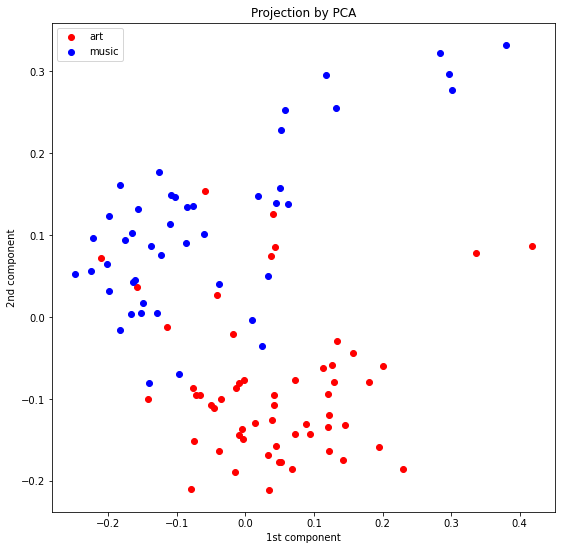

In [9]:
reds = df.index[df['class.labels'] == 'art'].tolist()
blues = df.index[df['class.labels'] == 'music'].tolist()

plt.figure(figsize=(9, 9))
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red", label="art")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue", label="music")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend()
plt.show()

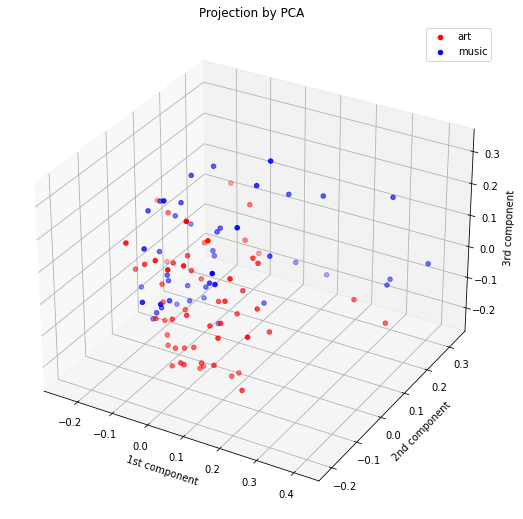

In [10]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], X_pca[np.array(reds), 2], c="red", label="art")
ax.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], X_pca[np.array(blues), 2], c="blue", label="music")
ax.set_title("Projection by PCA")
ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")
ax.set_zlabel("3rd component")
ax.legend()
plt.show()

#### 1.8 Draw a graph of the variance value depending on the leading direction number k. How much of the variance is retained after projection onto the first 10 leading components?

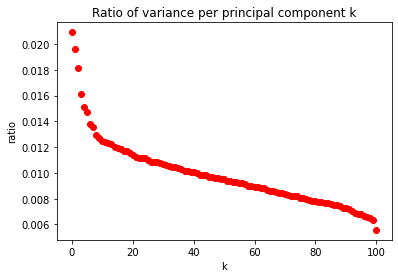

0.15773478029003488


In [11]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.title("Ratio of variance per principal component k")
plt.xlabel("k")
plt.ylabel("ratio")
plt.show()

print(sum(variance_ratio[0:10]))

After projecting onto the first 10 leading components, 15.77% of the variance will be retained.

### 2. Analysis of the 04Cars dataset

#### 2.1 Load the 04Cars dataset as a DataFrame (Pandas library) and filter out the last 11 columns - these will be used as input for PCA.

In [12]:
df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:,-11:]
array = data.values
attributes = list(data.columns.values[-11:])
print(attributes)

['Retail Price', 'Dealer Cost', 'Engine Size (l)', 'Cyl', 'HP', 'City MPG', 'Hwy MPG', 'Weight', 'Wheel Base', 'Len', 'Width']


#### 2.2 Normalize the data by ensuring that for each feature the arithmetic mean is 0 and the variance is 1.

In [13]:
scaled_array = scale(array)

#### 2.3 Perform a PCA transformation on the input data set and then plot the absolute and relative variance values on the leading direction number k. How much variance is retained when reducing dimensionality to 2 and 3 (see Figure 2)?

In [14]:
pca = PCA()
X_pca = pca.fit_transform(scaled_array)

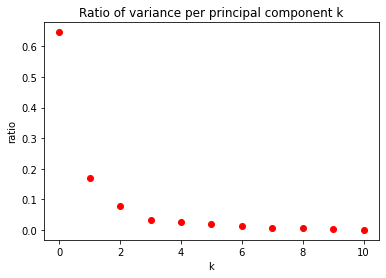

0.8171421089701892
0.8943901348942342


In [15]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.title("Ratio of variance per principal component k")
plt.xlabel("k")
plt.ylabel("ratio")
plt.show()

print(sum(variance_ratio[0:2]))
print(sum(variance_ratio[0:3]))

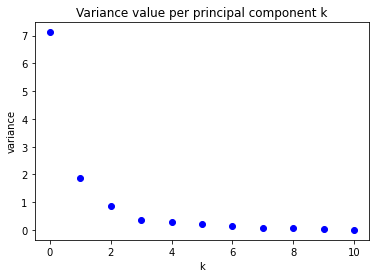

0.8171421089701892
0.8943901348942342


In [16]:
variance = pca.explained_variance_
plt.plot(variance, 'bo')
plt.title("Variance value per principal component k")
plt.xlabel("k")
plt.ylabel("variance")
plt.show()

print(sum(variance[0:2]) / sum(variance))
print(sum(variance[0:3]) / sum(variance))

When reducing dimensionality to 2, approximately 81.71% of the variance will be retained.

When reducing dimensionality to 3, approximately 89.44% of the variance will be retained.

#### 2.4 Display the element values of the first and second leading components along with their corresponding feature name. What do elements with values close to zero mean? What are the properties of a car related to:

— Largest elements of the first leading component

— The smallest elements of the first leading component

— Largest elements of the second leading component

— The smallest elements of the second leading component

In [17]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.2637504434440343:0.4685086975025391
Dealer Cost:-0.262318638753095:0.47014658513822594
Engine Size (l):-0.347080492025201:-0.015347186463713414
Cyl:-0.3341887576286373:0.07803201087501876
HP:-0.31860225848402945:0.2922134761391825
City MPG:0.31048172673231306:-0.0033659357616593055
Hwy MPG:0.3065886385804443:-0.010964460145348812
Weight:-0.3363293669404882:-0.16746357154787056
Wheel Base:-0.2662100335710543:-0.4181771069592045
Len:-0.25679018767068235:-0.40841138066875493
Width:-0.2960545914170612:-0.31289135016250724


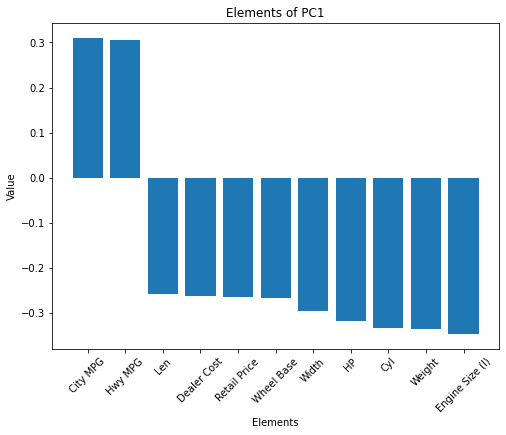

In [18]:
plt.figure(figsize=(8, 6))
x_pc1_sorted = np.array(attributes)[np.argsort(pc1)[::-1]]
y_pc1_sorted = np.array(pc1)[np.argsort(pc1)[::-1]]
plt.title("Elements of PC1")
plt.xlabel("Elements")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.bar(x_pc1_sorted, y_pc1_sorted)
plt.show()

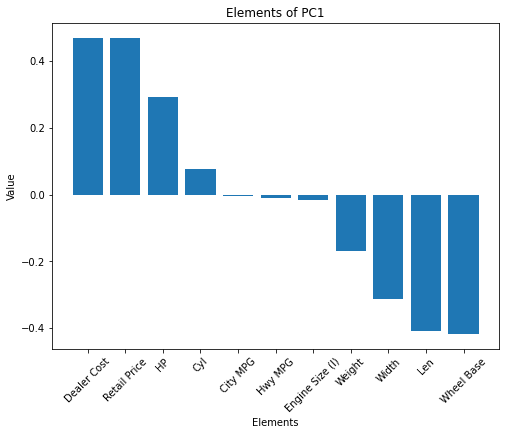

In [19]:
plt.figure(figsize=(8, 6))
x_pc2_sorted = np.array(attributes)[np.argsort(pc2)[::-1]]
y_pc2_sorted = np.array(pc2)[np.argsort(pc2)[::-1]]
plt.title("Elements of PC1")
plt.xlabel("Elements")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.bar(x_pc2_sorted, y_pc2_sorted)
plt.show()

Elements close to zero in the case of PCA mean that a given feature (attribute) has little impact on the formation of individual main components PC1 and PC2 in the context of the analyzed data.

Linking car ownership with individual components:

- The largest elements of the first leading component are associated with 'City MPG' and 'Hwy MPG';

- The smallest elements of the first leading component are associated with 'Engine Size (l)', 'Weight';

- The largest elements of the second leading component are related to 'Dealer Cost', 'Retail Price';

- The smallest elements of the second leading component are associated with 'Wheel Base', 'Len'.

You can see that elements that had high values for component 1 have low values for component 2, which means that they have little impact on this component.

#### 2.5 Visualize the feature vectors projected onto the first 2(3) leading components. Plot the text with the car model on the chart. What types of cars are in each part of the chart?

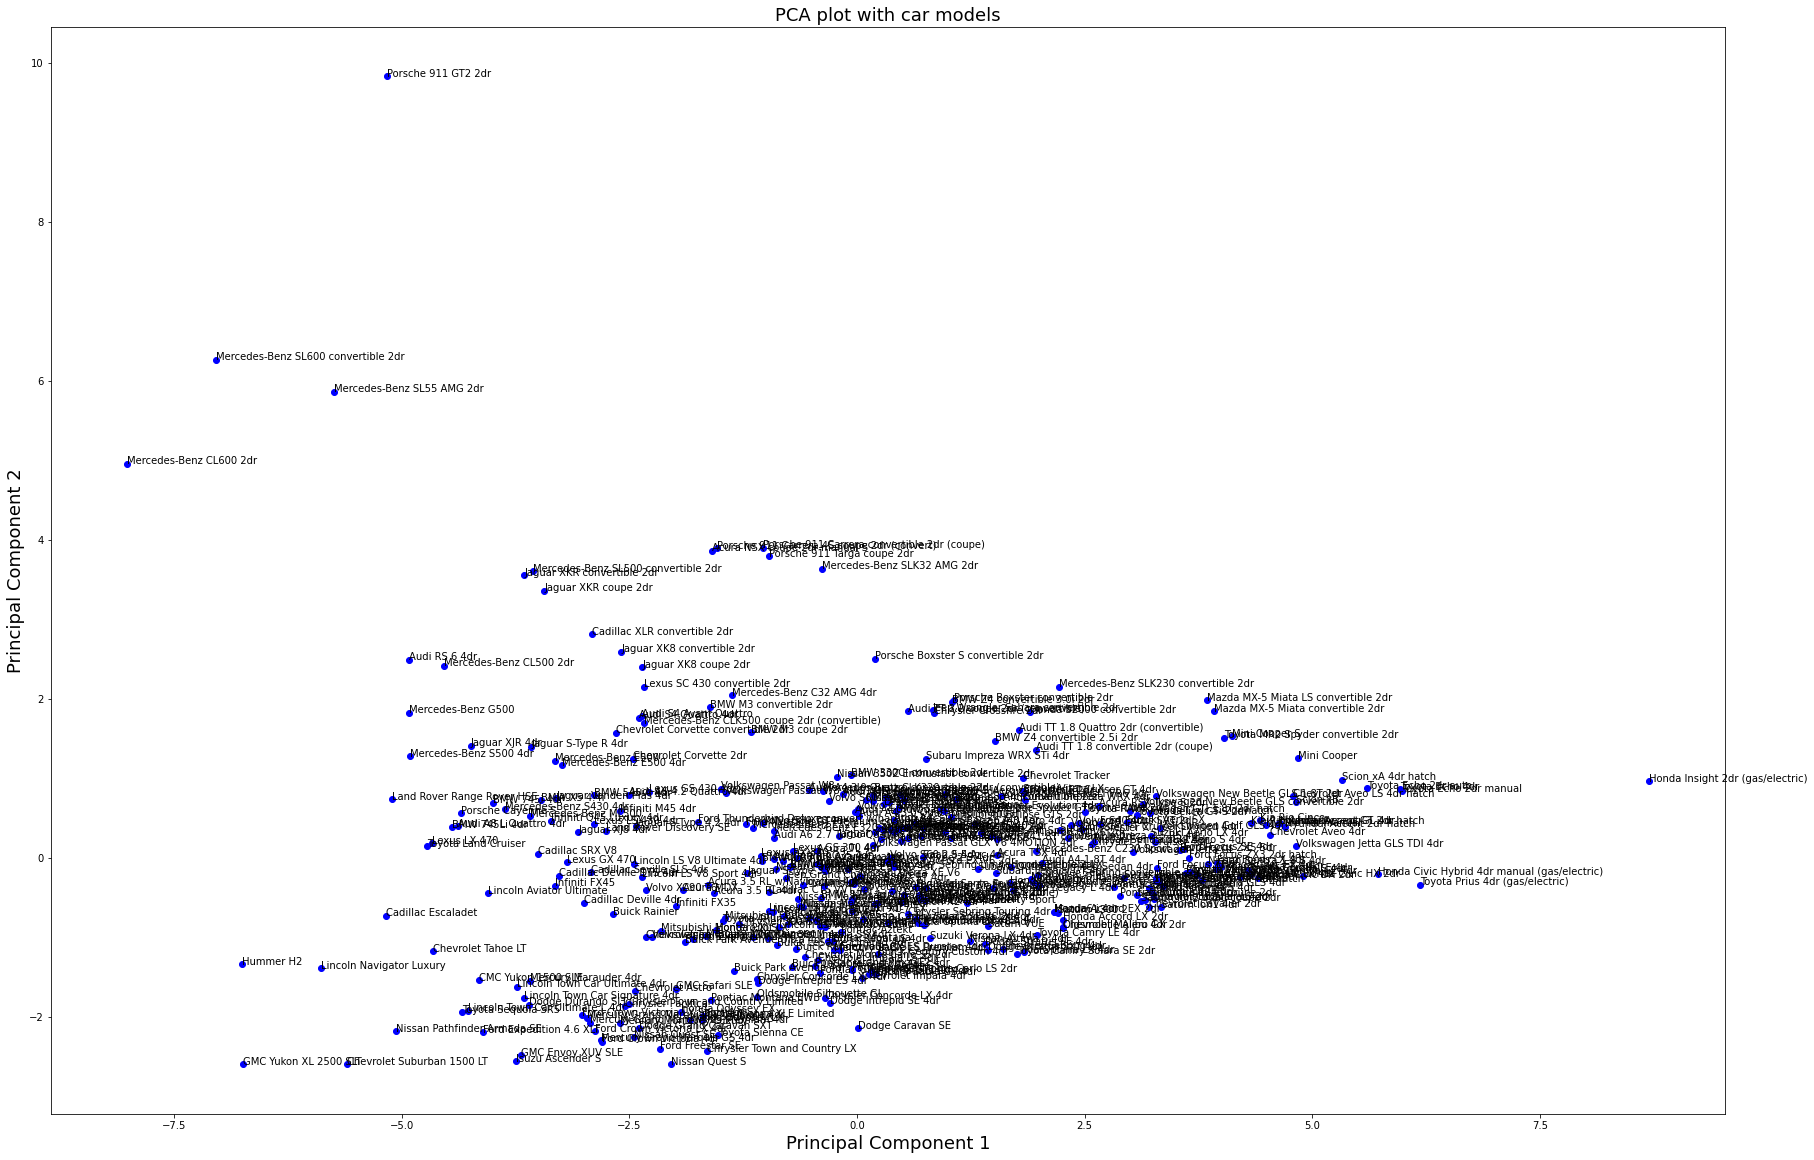

In [20]:
car_models = df['Vehicle Name'].to_list()

plt.figure(figsize=(30, 20))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b')

for i, car_model in enumerate(car_models):
    plt.annotate(car_model, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)
plt.title('PCA plot with car models', fontsize=18)
plt.show()


At the top of the chart (especially in the upper left corner) there are sports cars, e.g. Porsche. You can see that there is a significant difference between them and other cars due to their high price and high performance.

The lower left corner of the chart is dominated by large cars, e.g. Hummer H2, which are characterized by higher prices and larger engine capacities.

On the middle-right side there are typical cars owned by the majority of the population, characterized primarily by: low fuel consumption, small engine capacity and lower price.

#### 2.6 On the same 2D graph, present the reduced size dataset with a visualization of the features projected onto the first 2 leading components (biplot, see Figure 3). What does this type of visualization show?

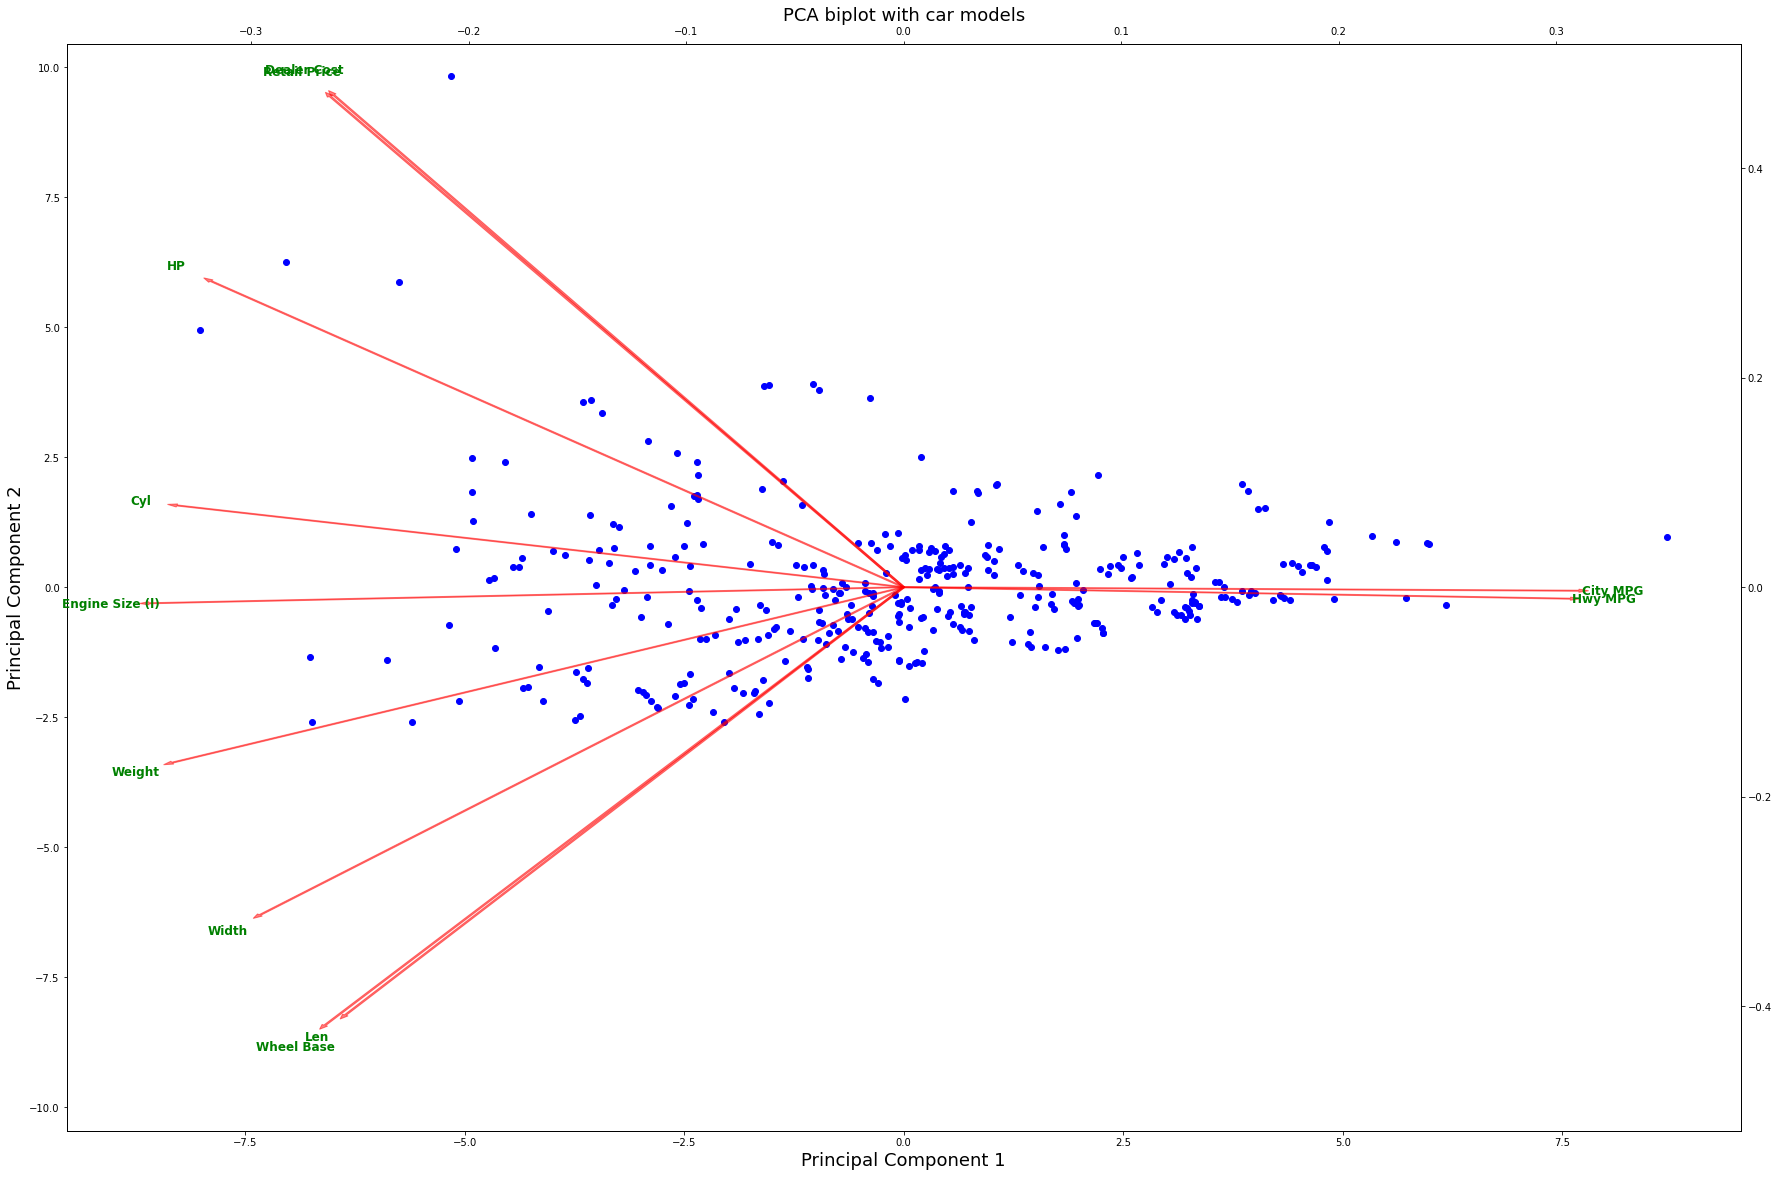

In [21]:
df_scores   = pd.DataFrame(X_pca, columns=['PC' + str(i) for i in range(1,data.shape[1] + 1)])
df_loadings = pd.DataFrame(pca.components_, columns=data.columns, index=df_scores.columns)

def biplot(df_scores: pd.DataFrame, df_loadings: pd.DataFrame) -> None:
    fig,ax = plt.subplots(figsize=(30,20))

    ax.scatter(df_scores.PC1.values, df_scores.PC2.values, color='b')
    ax.set_xlabel("Principal Component 1",fontsize=18)
    ax.set_ylabel("Principal Component 2",fontsize=18)
    ax.set_title('PCA biplot with car models',fontsize=18)

    ax2 = ax.twinx().twiny()
    font = {'color':  'g', 'weight': 'bold', 'size': 12,}
    
    for atr in df_loadings.columns.values:
        dx = df_loadings.loc['PC1', atr]
        dy = df_loadings.loc['PC2', atr]
        ax2.arrow(0, 0, dx, dy, color = 'r', alpha = 0.5)
        ax2.text(dx * 1.05, dy * 1.05, atr, fontdict = font, ha = 'center', va = 'center')
    
    mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.5)
    mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)
    
    plt.show()

biplot(df_scores, df_loadings)

The biplot visualization shows the following information:

- patterns in the data by identifying groups of observations that have similar variable profiles;

- correlations between variables, e.g. if two arrows are close to each other (the angle between the variable vectors is close to 0), it means that the variables are positively correlated, while inversely directed arrows indicate a negative correlation;

- importance of variables, i.e. the longer the arrow, the greater the influence of the corresponding variable on the construction of the PCA space;

- direction and how much each variable "contributes" to different observations, e.g. if data points are close to the arrow of a given variable, it means that this variable has a significant impact on a given observation. In other words, where is the greatest variability in the data for a given feature.

### 3. Additional task: construction of eigenfaces based on the LFW dataset

#### 3.1 Using the SciKit Learn library, load a subset of the LFW dataset consisting of people represented by at least 50 different photos (fetch lfw people()). This way you will get a collection of photos of 12 different people.

In [22]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
n_samples, h, w = lfw_people.images.shape

#### 3.2 Divide the received data set into training and testing parts (0.7, 0.3)

In [23]:
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3.3 For the training set, calculate PCA and, based on the first 100 principal components obtained in this way, reduce the dimensionality to 100 for the training and test sets.

In [24]:
pca_100 = PCA(n_components=100, svd_solver="randomized", whiten=True).fit(X_train)
X_train_pca_100 = pca_100.transform(X_train)
X_test_pca_100 = pca_100.transform(X_test)

#### 3.4 Using a training set with reduced dimensionality, train two selected classification models (e.g. MLP, SVM) and calculate the classification accuracy obtained for each of the 12 classes on the test set. Include the obtained values in the report: precision, recall, f1-score. How do the obtained results change when reducing to 50 dimensions? Select the optimal dimensionality based on the plot screen.

##### 3.4.1 SVM classification model for reduction to 100 dimensions

In [25]:
param_grid = {"C": loguniform(1e3, 1e5),"gamma": loguniform(1e-4, 1e-1),}
clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
clf_svm_100 = clf.fit(X_train_pca_100, y_train)

Calculating the classification accuracy obtained for each of the 12 classes on the test set.

                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.86      0.78        21
     Colin Powell       0.83      0.92      0.87        77
  Donald Rumsfeld       0.76      0.78      0.77        32
    George W Bush       0.89      0.88      0.89       162
Gerhard Schroeder       0.81      0.87      0.84        30
      Hugo Chavez       0.71      0.48      0.57        21
   Jacques Chirac       0.83      0.59      0.69        17
    Jean Chretien       0.89      0.94      0.91        17
    John Ashcroft       0.89      0.84      0.86        19
Junichiro Koizumi       1.00      0.85      0.92        13
  Serena Williams       0.77      0.77      0.77        13
       Tony Blair       0.89      0.89      0.89        46

         accuracy                           0.85       468
        macro avg       0.83      0.81      0.81       468
     weighted avg       0.85      0.85      0.85       468



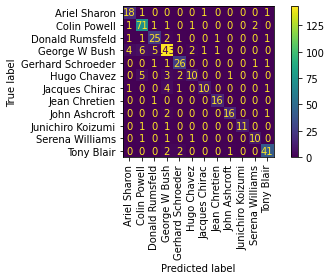

In [26]:
y_pred_svm_100 = clf_svm_100.predict(X_test_pca_100)

print(classification_report(y_test, y_pred_svm_100, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_svm_100, X_test_pca_100, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Precision determines the percentage of true positive cases among all cases classified as positive by the model. Precision scores range from 71% for Hugo Chavez to 100% for Junichiro Koizumi.

Recall measures the percentage of true positive cases that were classified as positive by the model out of all true positive cases in the data. The least false negative results were obtained for the Jean Chretien classifier, 0.94. The highest number of false negative results was obtained for the Hugo Chavez 0.48 classifier.

F1-score is the harmonic mean of precision and recall. It is a measure balanced between precision and sensitivity. The most efficient classifier was obtained for Jean Chretien, which was 0.91, and the least efficient classifier for Hugo Chavez was 0.57.

##### 3.4.2 SVM classification model for reduction to 50 dimensions

In [27]:
pca_50 = PCA(n_components=50, svd_solver="randomized", whiten=True).fit(X_train)
X_train_pca_50 = pca_50.transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)
clf_50 = clf.fit(X_train_pca_50, y_train)

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.76      0.73        21
     Colin Powell       0.84      0.88      0.86        77
  Donald Rumsfeld       0.63      0.69      0.66        32
    George W Bush       0.88      0.90      0.89       162
Gerhard Schroeder       0.60      0.60      0.60        30
      Hugo Chavez       0.83      0.71      0.77        21
   Jacques Chirac       0.82      0.53      0.64        17
    Jean Chretien       0.78      0.82      0.80        17
    John Ashcroft       0.81      0.89      0.85        19
Junichiro Koizumi       0.92      0.85      0.88        13
  Serena Williams       0.91      0.77      0.83        13
       Tony Blair       0.84      0.78      0.81        46

         accuracy                           0.81       468
        macro avg       0.80      0.77      0.78       468
     weighted avg       0.82      0.81      0.81       468



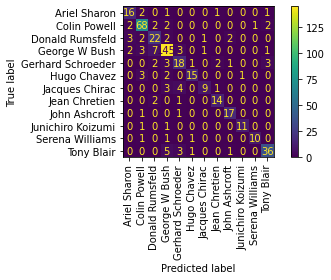

In [28]:
y_pred_svm_50 = clf_50.predict(X_test_pca_50)

print(classification_report(y_test, y_pred_svm_50, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_50, X_test_pca_50, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In the case of reduction to 50 dimensions, it can be observed that the precision and f1-score results are lower compared to the previous results, which means that the prediction is worse.

##### 3.4.3 MLP classification model for reduction to 100 dimensions.

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.67      0.72        21
     Colin Powell       0.86      0.91      0.89        77
  Donald Rumsfeld       0.64      0.72      0.68        32
    George W Bush       0.88      0.88      0.88       162
Gerhard Schroeder       0.76      0.83      0.79        30
      Hugo Chavez       0.83      0.48      0.61        21
   Jacques Chirac       0.70      0.41      0.52        17
    Jean Chretien       0.67      0.82      0.74        17
    John Ashcroft       0.83      0.79      0.81        19
Junichiro Koizumi       0.67      0.77      0.71        13
  Serena Williams       0.73      0.62      0.67        13
       Tony Blair       0.76      0.85      0.80        46

         accuracy                           0.81       468
        macro avg       0.76      0.73      0.73       468
     weighted avg       0.81      0.81      0.80       468



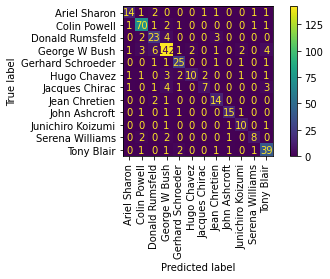

In [29]:
clf_mlp_100 = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_100, y_train)
y_pred_mlp_100 = clf_mlp_100.predict(X_test_pca_100)

print(classification_report(y_test, y_pred_mlp_100, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_mlp_100, X_test_pca_100, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Precision scores range from 64% for Donald Rumsfeld to 88% for George W Bush.

The least false negative recall results were obtained for the Colin Powell class, 0.91. The most false negative results were obtained for the Jacques Chirac 0.41 class.

The most efficient classifier according to f1-score was obtained for Colin Powell, which was 0.89, and the least efficient classifier for Jacques Chirac was 0.52.

##### 3.4.4 MLP classification model for reduction to 50 dimensions.

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.62      0.65        21
     Colin Powell       0.87      0.88      0.88        77
  Donald Rumsfeld       0.73      0.69      0.71        32
    George W Bush       0.89      0.89      0.89       162
Gerhard Schroeder       0.64      0.60      0.62        30
      Hugo Chavez       0.81      0.62      0.70        21
   Jacques Chirac       0.71      0.59      0.65        17
    Jean Chretien       0.64      0.82      0.72        17
    John Ashcroft       0.76      0.84      0.80        19
Junichiro Koizumi       0.71      0.77      0.74        13
  Serena Williams       0.83      0.77      0.80        13
       Tony Blair       0.77      0.87      0.82        46

         accuracy                           0.81       468
        macro avg       0.76      0.75      0.75       468
     weighted avg       0.81      0.81      0.81       468



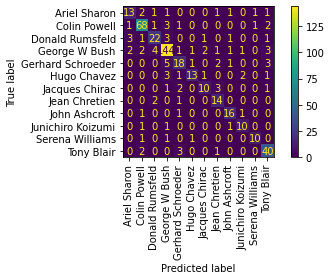

In [30]:
clf_mlp_50 = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_50, y_train)
y_pred_mlp_50 = clf_mlp_50.predict(X_test_pca_50)

print(classification_report(y_test, y_pred_mlp_50, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_mlp_50, X_test_pca_50, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In the case of reduction to 50 dimensions for MLP, it can be observed that the results are slightly higher compared to the previous results, i.e. there is a better prediction.

##### 3.4.5 Selection of optimal dimensionality based on screen plot.

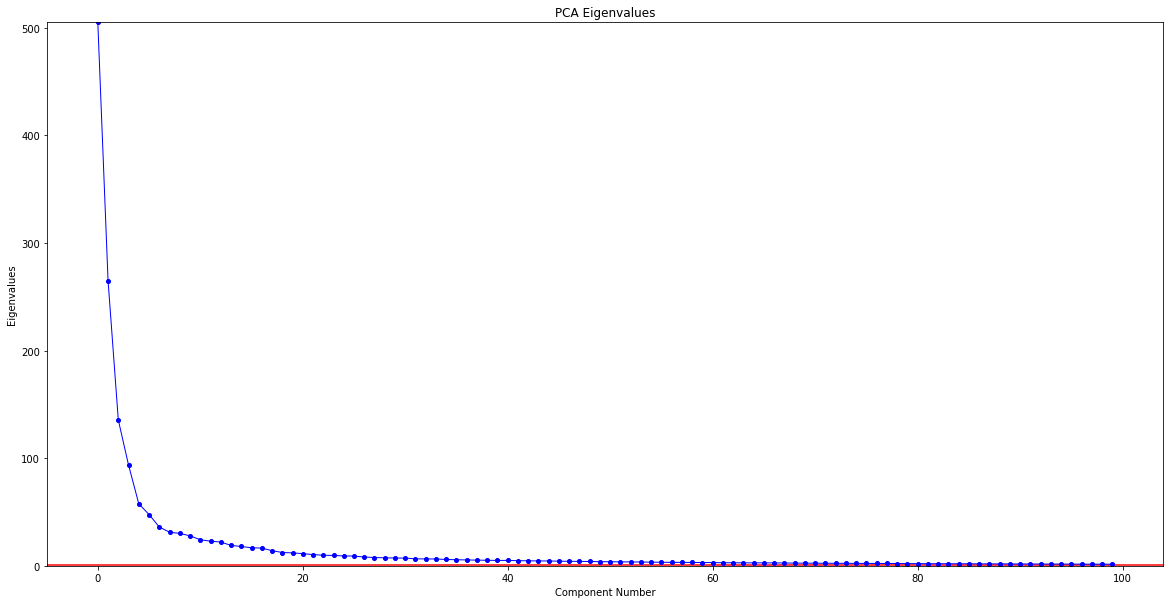

In [31]:
plt.figure(figsize=(20, 10))
plt.ylabel('Eigenvalues')
plt.xlabel('Component Number')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(pca_100.explained_variance_))
plt.axhline(y=1, color = 'r', linestyle = '-')
plt.style.context('seaborn-whitegird')
plt.plot(pca_100.explained_variance_, 'o-', linewidth=1, markersize = 4, color='blue')
plt.show()

According to the rule of thumb method, the number of components that have an eigenvalue greater than 1 should be selected. Based on the screen plot visualization above, the optimal dimensionality should be 100 components.

#### 3.5 Display the first 20 principal components (after rescaling) as a grayscale image (eigenfaces). How can one interpret the effect of eigenfaces in the context of reducing the dimensionality of a previously unseen image (test example)? What features do individual eigenfaces extract?

In [32]:
def plot_gallery(images, titles, h, w, n_row=4, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

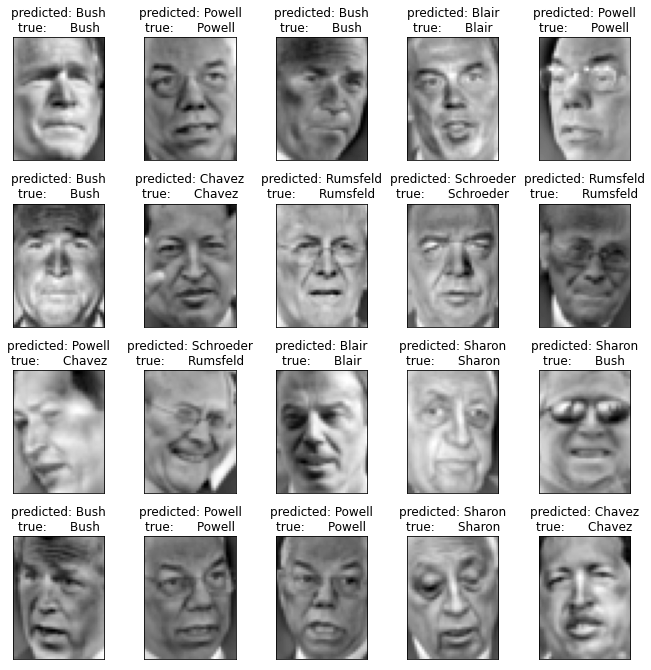

In [33]:
def title(y_predsvm_100, y_test, target_names, i):
    pred_name = target_names[y_pred_svm_100[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred_svm_100, y_test, target_names, i) for i in range(y_pred_svm_100.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

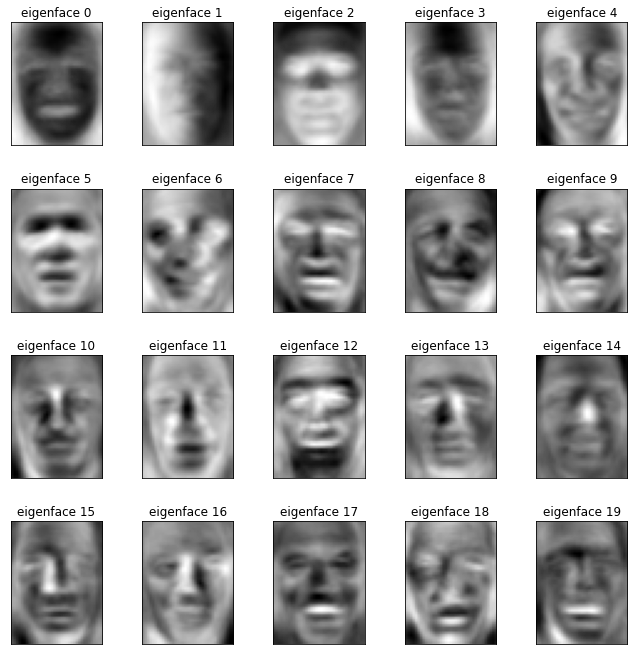

In [34]:
n_components = 100

eigenfaces = pca_100.components_.reshape((n_components, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

Eigenfaces in the context of dimensionality reduction in the case of a previously unseen photo is that each eigenface represents a certain characteristic facial feature that is important for distinguishing people in the training set. During dimensionality reduction, eigenfaces allow the extraction and preservation of the most important facial features that are important for classification, while eliminating noise and redundant information.

Individual eigenfaces extract facial features such as: the shape of the nose, the eyes (their shape and the distance between them), the shape of the mouth, and wrinkles.

## 4. Additional task: Kernel PCA

#### Reading the article given in the last point of the Literature (Kernel PCA).
#### Using Kernel PCA with an RBF kernel and a polynomial kernel (empirically adjusted kernel parameter):

#### 4.1 Perform the experiment described in the article, showing the linear separability (in a multidimensional space implicitly defined by kernel functions) of points representing the surfaces of two spheres with the same center and different radius.

Generating synthetic data sets. In this case, these are two concentric data spheres. It is assumed that an equal amount of data is distributed on both spheres, i.e. if N is the total number of all data points, then N/2 class 1 points are located on a sphere with radius r1. Proportionally N/2 points of class 2 are located on a sphere of radius r2. In addition, the paper reports that in a spherical coordinate system, the inclination (polar angle) θ is uniformly distributed in [0, π] and the azimuth (azimuthal angle) φ is uniformly distributed in [0, 2π] for both classes. In a uniform distribution, each point in a given interval has the same probability of occurring. In the described experiment, it was assumed that each data point has the following coordinates: x, y and z. Information is provided that these coordinates are distorted by the Gaussian noise of the standard deviation σnoise. The adopted parameters are: N = 1000, r1 = 40, r2 = 100, σnoise = 1.

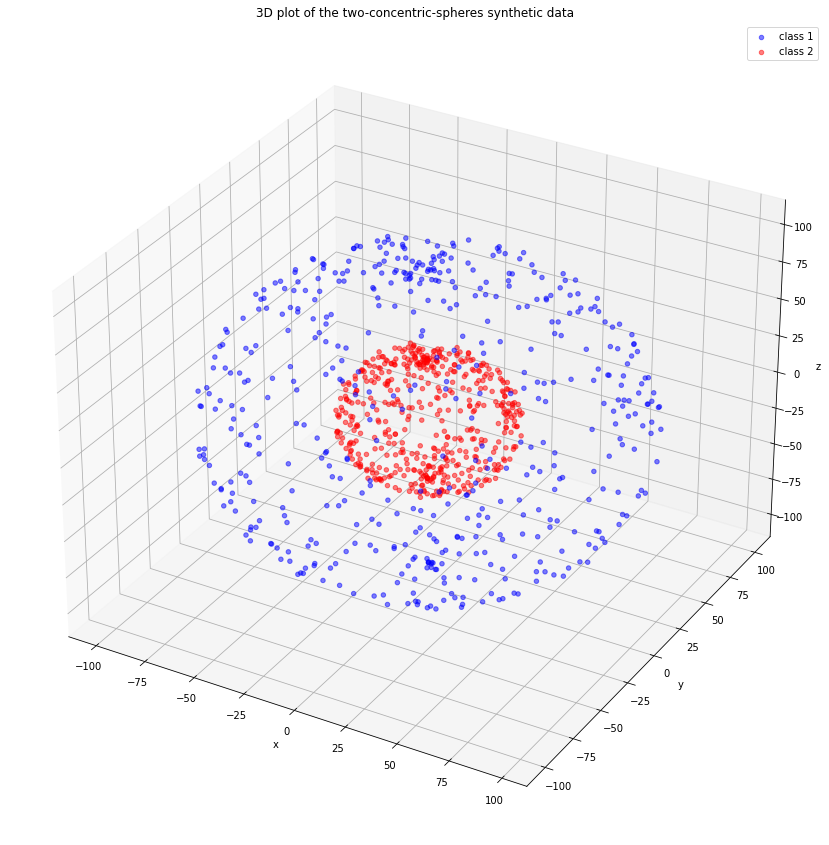

In [35]:
N = 1000
r1 = 40
r2 = 100
sigma_noise = 1

def generate_data(N, r1, r2, sigma_noise):
    polar_angles = np.random.uniform(0, np.pi, size=N//2)
    azimuthal_angles = np.random.uniform(0, 2 * np.pi, size=N//2)

    x1 = r1 * np.sin(polar_angles) * np.cos(azimuthal_angles)
    y1 = r1 * np.sin(polar_angles) * np.sin(azimuthal_angles)
    z1 = r1 * np.cos(polar_angles)

    x2 = r2 * np.sin(polar_angles) * np.cos(azimuthal_angles)
    y2 = r2 * np.sin(polar_angles) * np.sin(azimuthal_angles)
    z2 = r2 * np.cos(polar_angles)

    x1 += np.random.normal(0, sigma_noise, size=N//2)
    y1 += np.random.normal(0, sigma_noise, size=N//2)
    z1 += np.random.normal(0, sigma_noise, size=N//2)

    x2 += np.random.normal(0, sigma_noise, size=N//2)
    y2 += np.random.normal(0, sigma_noise, size=N//2)
    z2 += np.random.normal(0, sigma_noise, size=N//2)

    return np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)), np.hstack((z1, z2)))).T

data = generate_data(N, r1, r2, sigma_noise)

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[N//2:, 0], data[N//2:, 1], data[N//2:, 2], label='class 1', c='b', alpha=0.5)
ax.scatter(data[:N//2, 0], data[:N//2, 1], data[:N//2, 2], label='class 2', c='r', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title('3D plot of the two-concentric-spheres synthetic data')
plt.show()

**Standard PCA**

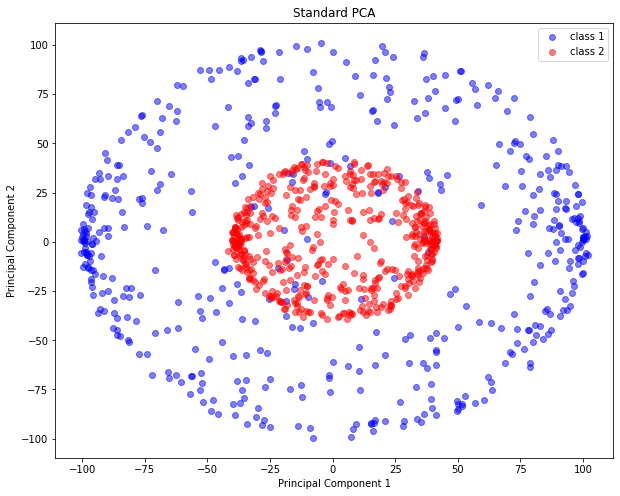

In [36]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_pca[N//2:, 0], data_pca[N//2:, 1], c='b', label='class 1', alpha=0.5)
plt.scatter(data_pca[:N//2, 0], data_pca[:N//2, 1], c='r', label='class 2', alpha=0.5)
plt.title('Standard PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In the visualization of standard PCA, we can see that it does not reveal structural information about the original data.

#### PCA kernel with RBF kernel with σ = 27.8

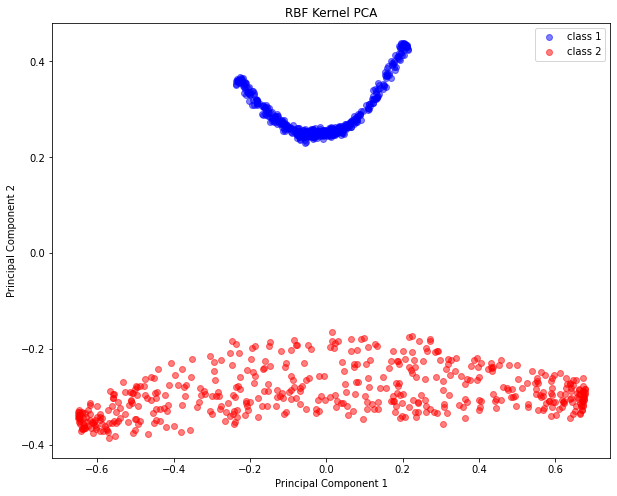

In [37]:
kernel_pca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma = 1 / (2.92 * 27.8**2))
data_kernel_pca_rbf = kernel_pca_rbf.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_kernel_pca_rbf[N//2:, 0], data_kernel_pca_rbf[N//2:, 1], c='b', label='class 1', alpha=0.5)
plt.scatter(data_kernel_pca_rbf[:N//2, 0], data_kernel_pca_rbf[:N//2, 1], c='r', label='class 2', alpha=0.5)
plt.title('RBF Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In the RBF Kernel PCA visualization, we can see that classes 1 and 2 are completely linearly separable. I would say that RBF performed the best in classification compared to other methods.

#### PCA kernel with polynomial kernel with d=5

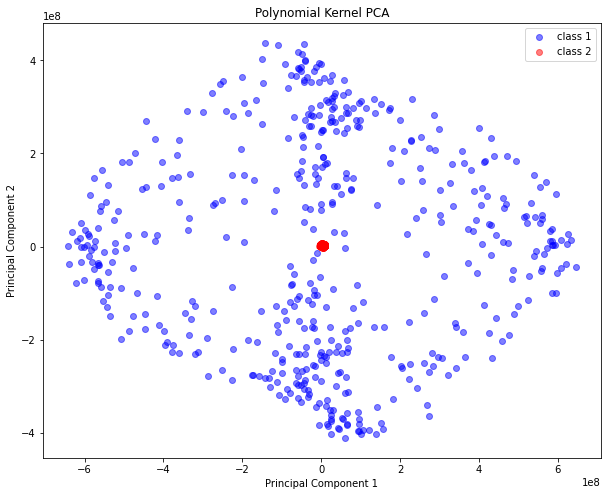

In [38]:
kernel_pca_poly = KernelPCA(n_components=2, kernel='poly', degree=5)
data_kernel_pca_poly = kernel_pca_poly.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_kernel_pca_poly[N//2:, 0], data_kernel_pca_poly[N//2:, 1], c='b', label='class 1', alpha=0.5)
plt.scatter(data_kernel_pca_poly[:N//2, 0], data_kernel_pca_poly[:N//2, 1], c='r', label='class 2', alpha=0.5)
plt.title('Polynomial Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In the Polynomial Kernel PCA visualization, you can see that class 2 data points are clustered while class 1 data points are scattered.

#### 4.2 Check whether applying non-linear dimension reduction using Kernel PCA will improve the classification results in task 7.3, 7.4.

Due to previous observations, nonlinear dimension reduction using Kernel PCA with an RBF kernel is used.

#### 4.2.1 Task 7.3, i.e. 3.3 in this report

In [49]:
kernel_pca_rbf_100 = KernelPCA(n_components=100, kernel='rbf', gamma = 1 / (2.92 * 27.8**2)).fit(X_train) #0.00003
X_train_kernel_pca_rbf_100 = kernel_pca_rbf_100.transform(X_train)
X_test_kernel_pca_rbf_100 = kernel_pca_rbf_100.transform(X_test)

##### 4.2.2 Task 7.4, i.e. 3.4 in this report

**SVM classification model for reduction to 100 dimensions**

In [50]:
param_grid = {"C": loguniform(1e3, 1e5),"gamma": loguniform(1e-4, 1e-1),}
clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
clf_kpca_rbf_svm_100 = clf.fit(X_train_kernel_pca_rbf_100, y_train)

Calculating the classification accuracy obtained for each of the 12 classes on the test set.

                   precision    recall  f1-score   support

     Ariel Sharon       0.52      0.67      0.58        21
     Colin Powell       0.77      0.84      0.81        77
  Donald Rumsfeld       0.60      0.66      0.63        32
    George W Bush       0.85      0.81      0.83       162
Gerhard Schroeder       0.42      0.50      0.45        30
      Hugo Chavez       0.86      0.57      0.69        21
   Jacques Chirac       0.71      0.29      0.42        17
    Jean Chretien       0.87      0.76      0.81        17
    John Ashcroft       0.71      0.79      0.75        19
Junichiro Koizumi       0.85      0.85      0.85        13
  Serena Williams       0.75      0.92      0.83        13
       Tony Blair       0.69      0.67      0.68        46

         accuracy                           0.74       468
        macro avg       0.72      0.70      0.69       468
     weighted avg       0.75      0.74      0.74       468



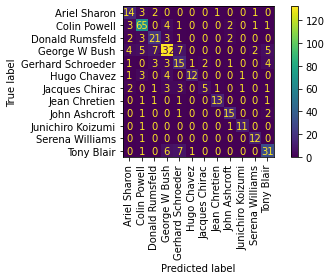

In [51]:
y_pred_kpca_rbf_svm_100 = clf_kpca_rbf_svm_100.predict(X_test_kernel_pca_rbf_100)

print(classification_report(y_test, y_pred_kpca_rbf_svm_100, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_kpca_rbf_svm_100, X_test_kernel_pca_rbf_100, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In this case, applying nonlinear dimension reduction using Kernel PCA with an RBF kernel worsened the results.

**3.4.2 SVM classification model for reduction to 50 dimensions**

In [52]:
kernel_pca_rbf_50 = KernelPCA(n_components=50, kernel='rbf', gamma = 0.00003).fit(X_train)
X_train_kernel_pca_rbf_50 = kernel_pca_rbf_50.transform(X_train)
X_test_kernel_pca_rbf_50 = kernel_pca_rbf_50.transform(X_test)

                   precision    recall  f1-score   support

     Ariel Sharon       0.52      0.71      0.60        21
     Colin Powell       0.82      0.81      0.81        77
  Donald Rumsfeld       0.63      0.69      0.66        32
    George W Bush       0.97      0.73      0.84       162
Gerhard Schroeder       0.57      0.57      0.57        30
      Hugo Chavez       0.59      0.62      0.60        21
   Jacques Chirac       0.38      0.53      0.44        17
    Jean Chretien       0.67      0.94      0.78        17
    John Ashcroft       0.55      0.89      0.68        19
Junichiro Koizumi       0.92      0.85      0.88        13
  Serena Williams       0.60      0.92      0.73        13
       Tony Blair       0.74      0.67      0.70        46

         accuracy                           0.74       468
        macro avg       0.66      0.74      0.69       468
     weighted avg       0.77      0.74      0.74       468



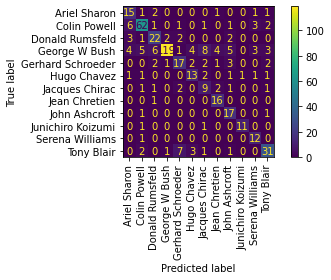

In [53]:
clf_kpca_rbf_svm_50 = clf.fit(X_train_kernel_pca_rbf_50, y_train)
y_pred_kpca_rbf_svm_50 = clf_kpca_rbf_svm_50.predict(X_test_kernel_pca_rbf_50)

print(classification_report(y_test, y_pred_kpca_rbf_svm_50, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_kpca_rbf_svm_50 , X_test_kernel_pca_rbf_50, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In this case, applying nonlinear dimension reduction using Kernel PCA with an RBF kernel worsened the results.

**MLP classification model for reduction to 100 dimensions**

C:\Users\Bartek\anaconda3\envs\r-github\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


                   precision    recall  f1-score   support

     Ariel Sharon       0.61      0.52      0.56        21
     Colin Powell       0.81      0.87      0.84        77
  Donald Rumsfeld       0.71      0.75      0.73        32
    George W Bush       0.83      0.89      0.86       162
Gerhard Schroeder       0.56      0.50      0.53        30
      Hugo Chavez       0.93      0.62      0.74        21
   Jacques Chirac       0.78      0.41      0.54        17
    Jean Chretien       0.81      0.76      0.79        17
    John Ashcroft       0.83      0.79      0.81        19
Junichiro Koizumi       0.86      0.92      0.89        13
  Serena Williams       0.75      0.92      0.83        13
       Tony Blair       0.76      0.74      0.75        46

         accuracy                           0.78       468
        macro avg       0.77      0.73      0.74       468
     weighted avg       0.78      0.78      0.78       468



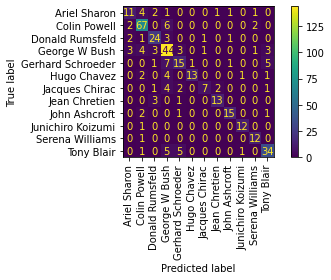

In [54]:
clf_kpca_rbf_mlp_100 = MLPClassifier(random_state=1, max_iter=300).fit(X_train_kernel_pca_rbf_100, y_train)
y_pred_kpca_rbf_mlp_100 = clf_kpca_rbf_mlp_100.predict(X_test_kernel_pca_rbf_100)

print(classification_report(y_test, y_pred_kpca_rbf_mlp_100, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_kpca_rbf_mlp_100, X_test_kernel_pca_rbf_100, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In this case, applying nonlinear dimension reduction using Kernel PCA with an RBF kernel slightly improved the results.

**MLP classification model for reduction to 50 dimensions**

C:\Users\Bartek\anaconda3\envs\r-github\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.62      0.65        21
     Colin Powell       0.88      0.86      0.87        77
  Donald Rumsfeld       0.59      0.72      0.65        32
    George W Bush       0.85      0.88      0.86       162
Gerhard Schroeder       0.53      0.57      0.55        30
      Hugo Chavez       0.72      0.62      0.67        21
   Jacques Chirac       0.50      0.35      0.41        17
    Jean Chretien       0.69      0.65      0.67        17
    John Ashcroft       0.88      0.74      0.80        19
Junichiro Koizumi       1.00      0.85      0.92        13
  Serena Williams       0.79      0.85      0.81        13
       Tony Blair       0.73      0.76      0.74        46

         accuracy                           0.77       468
        macro avg       0.74      0.70      0.72       468
     weighted avg       0.77      0.77      0.77       468



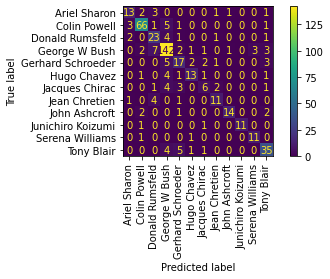

In [55]:
clf_kpca_rbf_mlp_50 = MLPClassifier(random_state=1, max_iter=300).fit(X_train_kernel_pca_rbf_50, y_train)
y_pred_kpca_rbf_mlp_50 = clf_kpca_rbf_mlp_50.predict(X_test_kernel_pca_rbf_50)

print(classification_report(y_test, y_pred_kpca_rbf_mlp_50, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf_kpca_rbf_mlp_50, X_test_kernel_pca_rbf_50, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In this case, applying nonlinear dimension reduction using Kernel PCA with an RBF kernel worsened the results.